In [1]:
import torch
import numpy as np

x = torch.empty(5, 4)
print(x)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [2]:
torch.ones(3, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [3]:
torch.zeros(2)

tensor([0., 0.])

In [4]:
torch.rand(5, 6)

tensor([[0.5898, 0.7882, 0.9220, 0.5927, 0.5312, 0.9678],
        [0.1722, 0.8758, 0.0567, 0.2525, 0.7025, 0.3238],
        [0.5921, 0.9074, 0.4691, 0.1486, 0.7848, 0.3185],
        [0.2162, 0.5907, 0.2011, 0.3267, 0.3733, 0.7116],
        [0.2410, 0.7535, 0.5709, 0.8960, 0.8079, 0.1480]])

In [5]:
l = [13, 4]
r = np.array([4, 56, 7])
torch.tensor(l)

tensor([13,  4])

In [7]:
torch.tensor(r)

tensor([ 4, 56,  7])

In [11]:
x.size()[0]

5

In [12]:
type(x)

torch.Tensor

In [13]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)
x + y

tensor([[0.8821, 0.7032],
        [1.5407, 1.5777]])

In [14]:
x

tensor([[0.7196, 0.0532],
        [0.9656, 0.6576]])

In [15]:
y

tensor([[0.1625, 0.6500],
        [0.5751, 0.9201]])

In [16]:
x+y

tensor([[0.8821, 0.7032],
        [1.5407, 1.5777]])

In [17]:
torch.add(x, y)

tensor([[0.8821, 0.7032],
        [1.5407, 1.5777]])

In [18]:
y.add(x)

tensor([[0.8821, 0.7032],
        [1.5407, 1.5777]])

In [19]:
y.add_(x)

tensor([[0.8821, 0.7032],
        [1.5407, 1.5777]])

In [20]:
y

tensor([[0.8821, 0.7032],
        [1.5407, 1.5777]])

In [21]:
x = torch.rand(8, 8)
print(x.size())

torch.Size([8, 8])


In [23]:
a = x.view(64)
print(a.size())

torch.Size([64])


In [24]:
b =  x.view(-1, 4, 4)
print(b.size())

torch.Size([4, 4, 4])


In [25]:
x = torch.rand(8,8)
y = x.numpy()
type(y)

numpy.ndarray

In [27]:
x = torch.ones(1)
print(x.item())

1.0


In [28]:
import matplotlib.pyplot as plt

x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2*x + torch.rand(5,1)  # y는 실제 값으로 임의로 5개를 만들어 준다.
num_features = x.shape[1]  # 변수의 개수를 저장하는 num_features. x의 크기는 torch.Size([5,1])이므로 인스턴스의 개수가 5개이고 변수의 개수가 1개인 데이터

In [29]:
# 역전파 설정 requires_grad=True
w = torch.randn(num_features, 1, requires_grad=True)  # 선형식은 y = wx + b로 표현.
b = torch.randn(1, requires_grad=True)  # 편향 b는 모든 인스턴스에 동일한 숫자를 더해주는 것이므로 크기가 1인 텐서로 정의

In [37]:
# 경사하강법
learning_rate = 1e-3  # 학습률
optimizer = torch.optim.SGD([w,b], lr=learning_rate)

loss_stack = []
for epoch in range(100):
    optimizer.zero_grad()  # 매 epoch마다 누적된 값을 optimizer.zero_grad()를 통해 초기화
    y_hat = torch.matmul(x,w) + b  # 회귀식 모델을 이용하여 예측값을 산출
    loss = torch.mean((y_hat - y) ** 2)  # 예측값과 실제값을 이용하여 손실함수를 계산. 사용된 함수는 MSE
    loss.backward()  # 역전파의 기준을 손실함수로 정의
    optimizer.step()  # 미리 정의한 optimizer를 이용하여 최적화를 시행
    loss_stack.append(loss.item())  # 그래프를 그리기 위해 손실함수 값만 loss_stack에 넣는다. item()을 사용하지 않으면 loss텐서 전체를 저장하게 된다.

    if epoch % 100 == 0:  # epoch이 100으로 나눠 떨어질 때마다 손실함수 값을 출력
        print(f'Epoch {epoch} : {loss.item()}')

Epoch 0 : 0.22209283709526062


In [38]:
# 최종 학습된 w, b로 예측값을 산출
with torch.no_grad():  # 최적화를 사용하지 않으므로 requires_grad를 비활성화
    y_hat = torch.matmul(x,w) + b

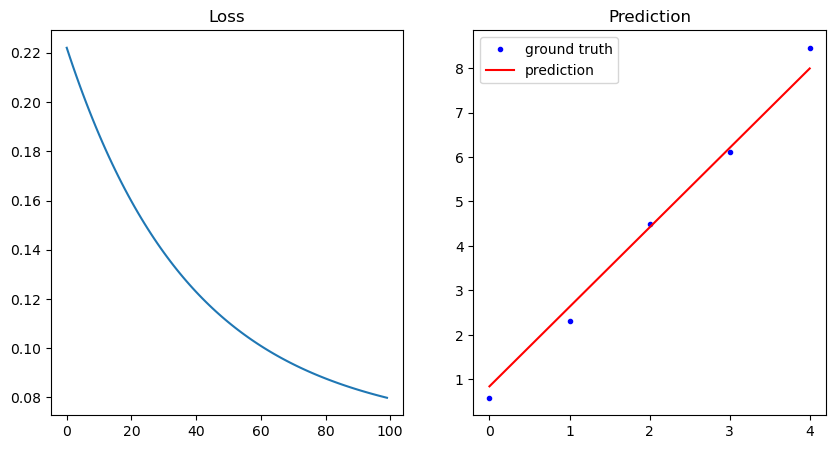

In [39]:
# 손실함수와 회귀선 그래프

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x, y, '.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground truth','prediction'])
plt.title("Prediction")
plt.show()